In [19]:
from random import randint, random

import matplotlib.pyplot as plt  # Библиотека для графического отображения данных
import numpy as np  # Библиотека по работе с массивами данных
from scipy.misc import derivative  # Функция получения производной


def generate_route_progression():
    res = np.zeros(50)
    curr_num = 0
    i = 0
    while i < 50:
        r = random()
        h = randint(1, 5)
        curr = np.full(h, curr_num)
        for j in range(h):
            curr[j] += h * (j + 1)
        curr_num = curr[h - 1]
        slice = res[i:i + h].view()
        slice[:slice.shape[0]] = curr[:slice.shape[0]]
        i += h
    return res


def generate_missing_route_progression():
    data = generate_route_progression()
    time = np.array([0, 10, 13, 14, 20, 31, 33, 35, 40, 50])
    route = np.array(
        [data[0], data[10], data[13], data[14], data[20], data[31], data[33], data[35], data[40], data[49]])
    return time, route

# Предел и производная
----------------

## Аналитический подход
**Предел** --- одно из основных понятий математического анализа, на него опираются такие фундаментальные разделы анализа, как непрерывность, производная, интеграл, бесконечные ряды и др.

**Производная** --- предел отношения приращения функции к приращению её аргумента при стремлении приращения аргумента к нулю.

*Формула:*

$$f'(x_0)=\lim_{\Delta x \to 0}\frac{f(x_0 + \Delta x)-f(x_0)}{\Delta x0}$$

*Визуализация:*

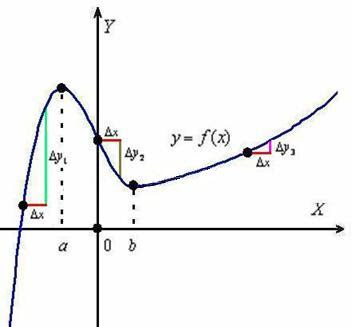

## Численный подход (численное дифференцирование)

#### Пример
Возьмём для примера следующую функцию:
$$f(x)=2x^3 + x + 3$$

In [20]:
# Определим кубическую функцию
def f(x):
    return 2 * (x ** 3) + x + 3

Для вычисления её производной воспользуемся библиотекой scipy, её функцией `derivative`
из модуля `misc`.

In [21]:
# Функция-обертка для расчета производной функции f
def f_derivative(x):
    return derivative(f, x)

Чтобы наглядно понять, что представляет собой наша функция и её производная,
воспользуемся библиотекой `matplotlib`.

In [22]:
# Определяем интервал x для графика
x = np.linspace(-6, 6)
# Определяем значения функции на данном интервале
y = f(x)

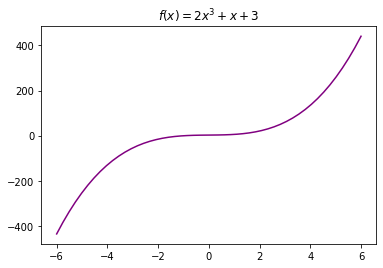

In [23]:
# Строим график функции
plt.title("$f(x)=2x^3 + x + 3$")
plt.plot(x, y, color='purple', label='Function')

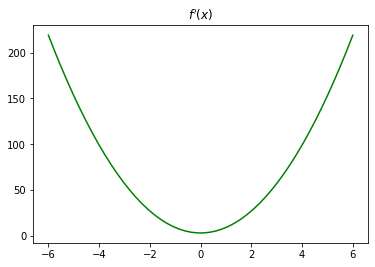

In [24]:
# Находим производную и строим ее график
der = f_derivative(x)
plt.title("$f'(x)$")
plt.plot(x, der, color='green', label='Derivative')

Мы успешно взяли производную и построили её график.

Но является ли производная непрерывной функцией?

In [25]:
#print(x)
#print(y)
#print(der)

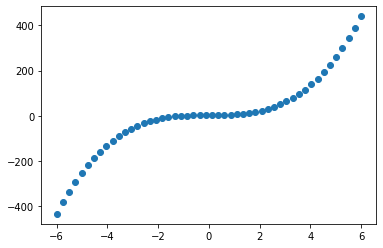

In [26]:
plt.scatter(x, y)

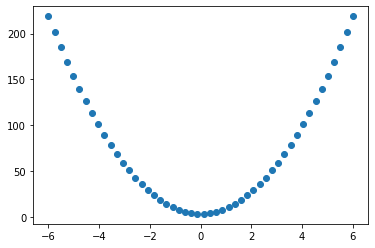

In [27]:
plt.scatter(x, der)

#### Численный подход
$$\frac {df(x)}{dx} = \lim_{\Delta x \to 0} \frac{\Delta y}{\Delta x} \approx \frac {\Delta y}{\Delta x}$$,
где ${\Delta y}$ и ${\Delta x}$ малые приращения функции и её аргумента.
#### Причины появления
Аналитические решения хороши и точны, однако не все функции можно посчитать аналитически.
Например, учёный проводит физические замеры в ходе эксперимента или
gps маяк отправляет координаты движущейся машины.
Функции, заданные таким образом, называются таблично-заданными,
и к ним не могут быть применены аналитические методы.
Или же функция может быть на столько сложной,
что вычисление каждого нового значения будет занимать очень много времени.

В этом случае на помощь и приходит численное дифференцирование и, в дополнение к нему, интерполяция.

**Интерполяция** --- в вычислительной математике нахождение неизвестных промежуточных значений некоторой функции, по имеющемуся дискретному набору её известных значений, определенным способом.

#### Формулы численного дифференцирования
Шаг вправо:

$$f(x) = \frac {f(x+h) - f(x)}{h}$$

Шаг влево:

$$f(x) = \frac {f(x) - f(x-h)}{h}$$

Шаг вправо и влево:

$$f(x) = \frac {f(x+h) - f(x-h)}{2h}$$

#### Интерполяционная формула Лагранжа:
Общая:

$$L_n(x)= \sum_{i=0}^{n}{\frac{(x-x_0)(x-x_1)...(x-x_{i-1})(x-x_{i+1})...(x-x_n)}{(x_i-x_0)(x_i-x_1)...(x_i-x_{i-1})(x_i-x_{i+1})...(x_i-x_n)}y_i}$$

Первой степени (линейная):

$$L_1(x) = \frac{(x-x_1)}{x_0-x_1}y_0 + \frac{(x-x_0)}{(x_1-x_0)}y_1$$

Второй степени (квадратичная):

$$L_2(x) = \frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)}y_0 + \frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)}y_1 + \frac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)}y_2$$

Оценка погрешности интерполяции:

$$R_m = |f(x)-L_m(x)| \approx |L_{m+1}(x) - L_m(x)|$$

## Практика.
### Реализация алгоритма дифференцирования
Здесь мы реализуем функцию численного дифференцирования.

In [27]:
def my_derivative(func, x: np.ndarray, h=0.01):
    # Если край интервала, то право или лево, иначе и вправо, и влево
    # x = [1, 2, 3], shape = (3,)
    y = np.zeros(x.shape)
    if isinstance(func, np.ndarray):
        y[0] = (func[1] - func[0]) / abs(x[1] - x[0])
        y[-1] = (func[-1] - func[-2]) / abs(x[-2] - x[-1])
        for r in range(1, len(x) - 1):
            y[r] = (func[r + 1] - func[r - 1]) / (abs(x[r + 1] - x[r])+abs(x[r] - x[r - 1]))
    else:
        y[0] = (func(x[0] + h) - func(x[0])) / h
        y[-1] = (func(x[-1]) - func(x[-1] - h)) / h
        for r in range(1, len(x) - 1):
            y[r] = (func(x[r] + h) - func(x[r] - h)) / (2 * h)
    return y

def f_my_derivative(x):
    return my_derivative(f, x)


# Определяем интервал x для графика
_x = np.linspace(-6, 6)
# Определяем значения функции на данном интервале
_der = f_my_derivative(x)
plt.title("$f'(x)$")
plt.plot(_x, _der, color='green', label='Derivative')
plt.scatter(_x, _der)


### Дифференцирование
Задача:

Представим, что мы разрабатываем ПО для транспортно-логистической компании, занимающейся автодорожными перевозками.
В каждой машине, принадлежащей нашей компании находится GPS-трэкер, который раз в минуту отправляет на наш сервер координаты машины.
Для упрощения задачи допустим, что координатой является не координаты GPS-системы (широта и долгота), а сколько киллометров пройдено от начальной до конечной точки маршрута следования.
Согласно такому набору координат, необходимо построить примерный график скорости машины на всем пути.

Данные о движении автомобиля можно получить из функции `generate_route_progression()`.

In [27]:
x = np.linspace(0, 50, num=50)
data = generate_route_progression()

plt.plot(x, data)

In [ ]:
der_data = my_derivative(data, x)

plt.plot(x, der_data)


### Дополнительно. Реализация алгоритма интерполяции
Здесь мы реализуем функцию численной интерполяции по формуле Лагранжа.

Расчёт $L_n(x)$:

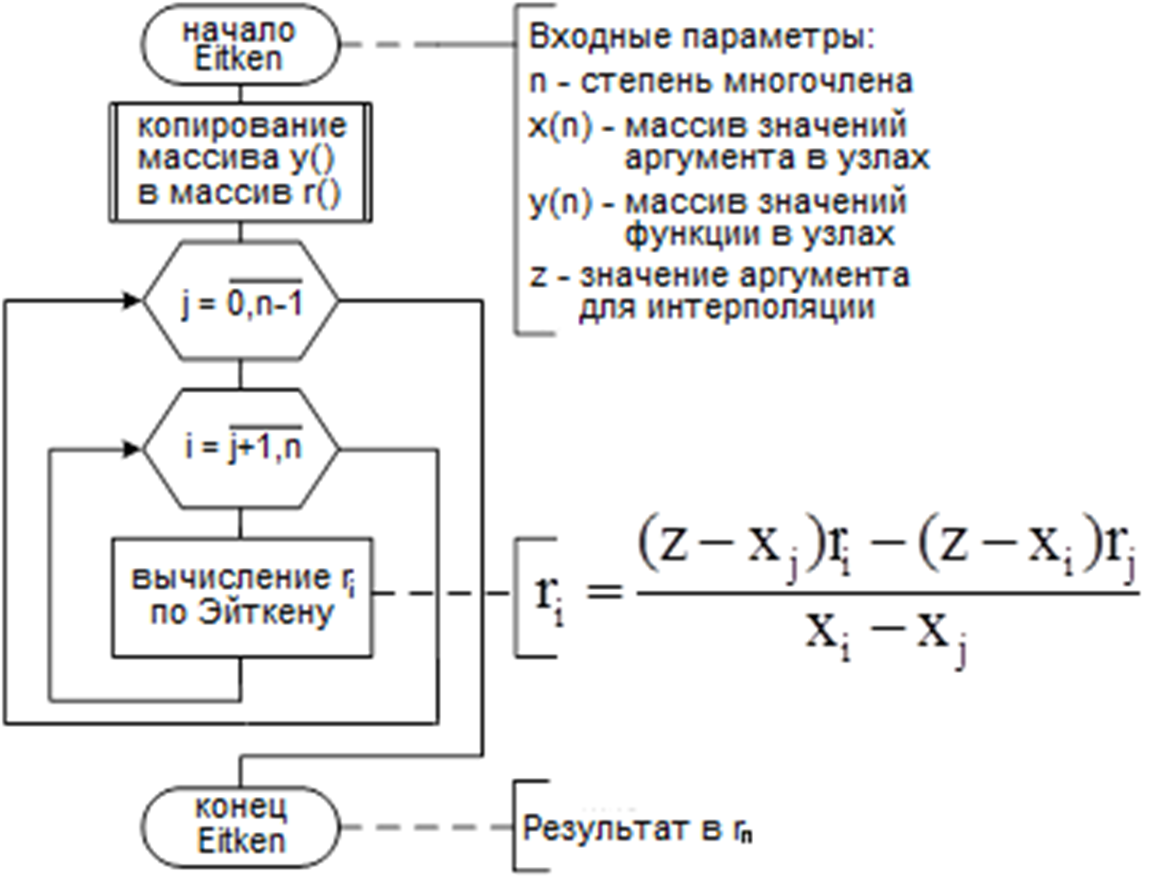

Интерполяция по Лагранжу с соблюдением заданной точности:

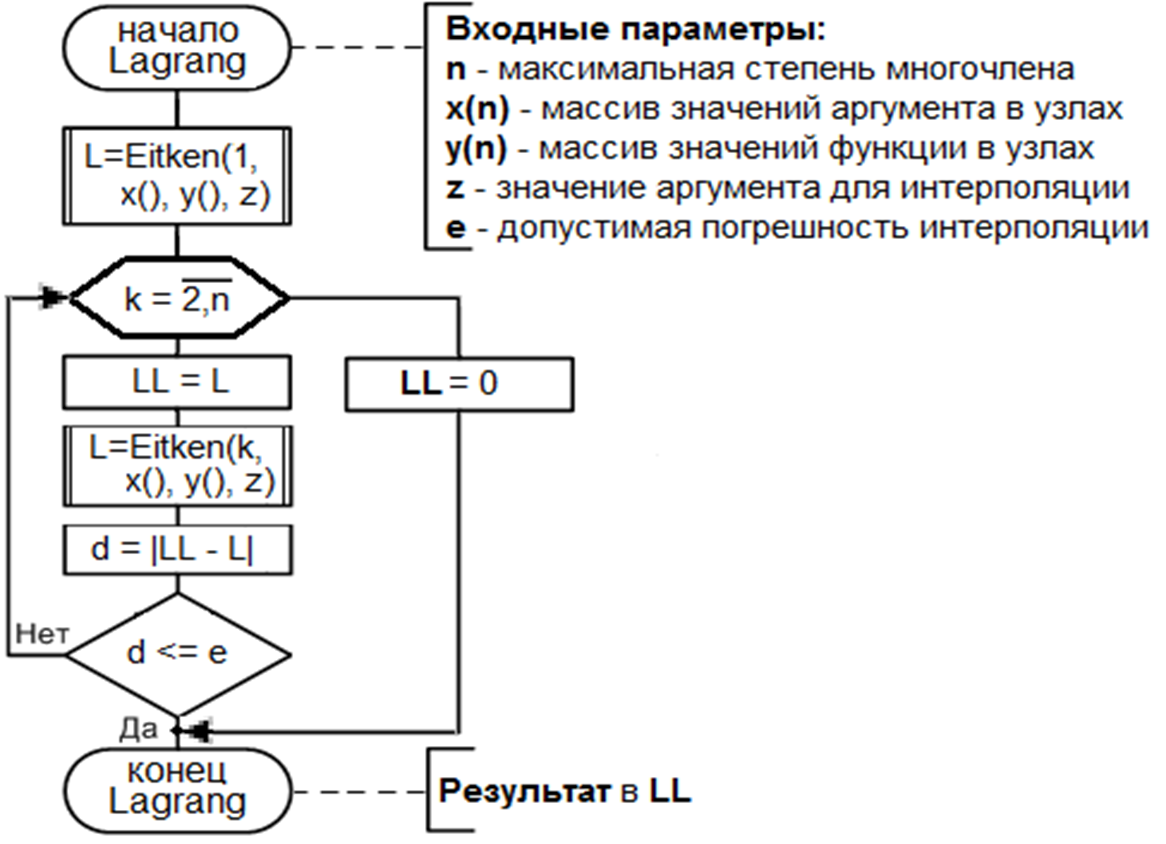

In [27]:
def l_n(n, x: np.ndarray, y: np.ndarray, z):
    r = y.copy()
    n -= 1
    for j in range(n):
        for i in range(j+1, n + 1):
            r[i] = ((z - x[j])*r[i] - (z - x[i])*r[j]) / (x[i] - x[j])
    return r[n]

def lagrange(n, x: np.ndarray, y: np.ndarray, z, e):
    L = l_n(1, x, y, z)
    for k in range(2, n + 1):
        LL = L
        L = l_n(k, x, y, z)
        d = abs(LL -L)
        if d <= e:
            break
    return L

def interp(x, y, e):
    def wrapper(z):
        return lagrange(len(x), x, y, z, e)
    return wrapper


inter_data = interp(x, data, 0.1)

d = [inter_data(x) for x in x]

plt.plot(x, d)

#der_inter = my_derivative(d, x)

#plt.plot(x, der_inter)

### Дополнительно. Дифференцирование с применением интерполяции
Задача:

Во время движения автомобиля постоянно пропадала связь с gps маяком,
из-за чего на контрольной станции было получено лишь 10 точек из 50.
На основании этих данных восстановите путь автомобиля и определите график его скорости.

Данные о движении автомобиля можно получить из функции `generate_missing_route_progression()`.

In [27]:
time, data = generate_missing_route_progression()
print(time)
print(data)

inter_data = interp(time, data, 0.1)

d = np.array([inter_data(x) for x in x])

plt.plot(x, d, color="green")
plt.scatter(time, data)

In [ ]:
from scipy.interpolate import interp1d

time, data = generate_missing_route_progression()
print(data)
inter = interp1d(time, data)
x = np.linspace(0, 49)
plt.plot(x, inter(x))
plt.scatter(time, data)
x = np.linspace(1, 48)
plt.plot(x, derivative(inter, x))

## Самостоятельно
* Изучение исходного кода библиотечных функций `derivative` и `interp1d`.